# Sales Prediction

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [2]:
df_clvData1 = pd.read_csv("clvData1.csv")

### Importing the necessary libraries for the code execution

In [3]:
#Linear Regression
results = smf.ols('futureMargin ~ margin', data=df_clvData1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           futureMargin   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     1935.
Date:                Fri, 02 Aug 2019   Prob (F-statistic):               0.00
Time:                        23:15:48   Log-Likelihood:                -17076.
No. Observations:                4191   AIC:                         3.416e+04
Df Residuals:                    4189   BIC:                         3.417e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.6307      0.494     25.581      0.0

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


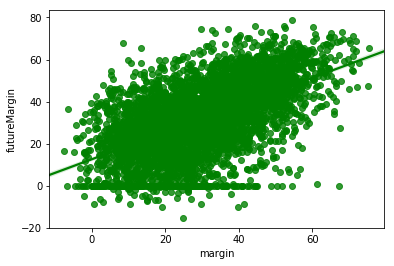

In [4]:
sns.regplot(x=df_clvData1.margin, y= df_clvData1.futureMargin,color="green")
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anac

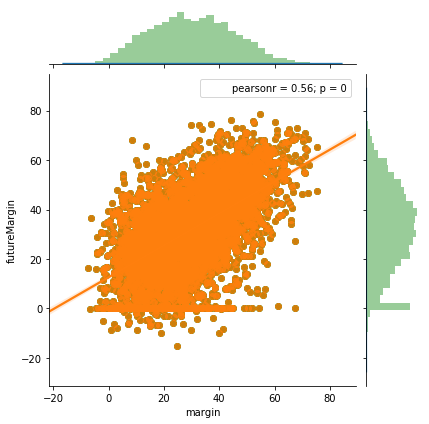

In [5]:
g = sns.jointplot(x=df_clvData1.margin, y= df_clvData1.futureMargin,color="green")
g.plot(sns.regplot, sns.distplot)
plt.show()


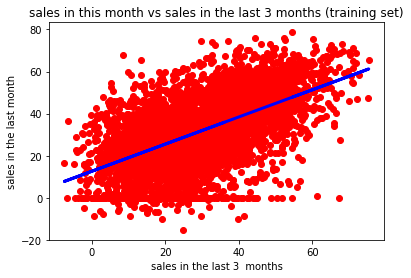

In [6]:
plt.scatter(df_clvData1.margin,df_clvData1.futureMargin,color='red')
plt.plot(df_clvData1.margin, results.predict(), linewidth = 3,color = 'blue')
plt.title('sales in this month vs sales in the last 3 months (training set)')
plt.xlabel('sales in the last 3  months')
plt.ylabel('sales in the last month')
plt.show()

In [7]:
#gather features
features = "+".join(df_clvData1.drop("futureMargin",axis=1).columns)

In [8]:
#Multiple Linear Regression
results = smf.ols('futureMargin ~ '+ features, data=df_clvData1).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           futureMargin   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     164.3
Date:                Fri, 02 Aug 2019   Prob (F-statistic):               0.00
Time:                        23:15:50   Log-Likelihood:                -16952.
No. Observations:                4191   AIC:                         3.393e+04
Df Residuals:                    4176   BIC:                         3.403e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             21.9359      1

In [9]:
#Checking for multi-colinearity
# get y and X dataframes based on this regression:
y, X = dmatrices('futureMargin ~' + features, df_clvData1, return_type='dataframe')

vif = pd.DataFrame()
# For each X, calculate VIF and save in dataframe
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,47.6,Intercept
1,1.0,gender[T.male]
2,1.0,customerID
3,11.6,nOrders
4,13.2,nItems
5,1.4,daysSinceLastOrder
6,3.7,margin
7,1.3,returnRatio
8,1.4,shareOwnBrand
9,1.2,shareVoucher


In [10]:
#Prediction for future Data sales
df_predict = pd.read_csv("clvData2.csv")
results.predict(df_predict)

0       52.444469
1       28.720002
2       52.061319
3       52.405473
4       35.490413
5       33.231580
6       36.984526
7       46.350838
8       46.479020
9       28.742198
10      48.355421
11      54.641151
12      25.093466
13      64.066892
14      19.275739
15      48.257843
16      55.656913
17      22.242516
18      39.283886
19      24.503823
20      26.884776
21      42.785205
22      21.296084
23      23.886342
24      22.066840
25      58.545431
26      40.598261
27      37.743176
28      43.809418
29      36.163275
          ...    
3980    48.320397
3981    42.580578
3982    19.546163
3983    30.801020
3984    43.472710
3985    36.358736
3986    45.745628
3987    41.467073
3988    38.611097
3989    39.617592
3990    41.329231
3991    37.883538
3992    42.205839
3993    33.029528
3994    41.155070
3995    56.828281
3996    41.893893
3997    35.688383
3998    50.648447
3999    56.162816
4000    32.072885
4001    34.310247
4002    55.295311
4003    39.151664
4004    22